In [1]:
from PIL import Image
import datetime
import time
from datetime import timedelta
from krwordrank.word import KRWordRank
from krwordrank.hangle import normalize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from krwordrank.word import KRWordRank
from krwordrank.word import summarize_with_keywords
from krwordrank.sentence import summarize_with_sentences

# 2030 데이터로 키워드 추출

In [2]:
df = pd.read_csv('data/2030정치.csv', index_col=0)
df

,Date,ID,Comment,Comment_date,Channel,Like,Dislike,Comment_like
Title,,,,,,,,
[2030 : 페미니즘 분노폭발] MZ세대 정치를 말한다 + 해바라기 김래원,2021-05-12,김구레,여자라서 죽었다라는 말은 지금 이자리에서 이준석말고는 아무도 하고있지않습니다.그니까...,2021-05-13,게임농부,8,0,1
[2030 : 페미니즘 분노폭발] MZ세대 정치를 말한다 + 해바라기 김래원,2021-05-12,김구레,남성이 많을까요?여성이 많을까요?남성이 많은거랑 모든 남성을 잠재적범죄자 취급하는거...,2021-05-13,게임농부,8,0,1
"문재인난리났다! 신전대협이해냈다, 2030세대 대환호!",2021-05-10,한영래,"임종석은 림종석, 이인영 은 리인녕, 임수경은 림수경이라 쓴다. 북한 추종자 동무들...",2021-05-10,정성산TV,2.5천,14,97
"문재인난리났다! 신전대협이해냈다, 2030세대 대환호!",2021-05-10,Spiegel TV 스피겔 TV,문재인이 처벌당해야 한다,2021-05-10,정성산TV,2.5천,14,80
"문재인난리났다! 신전대협이해냈다, 2030세대 대환호!",2021-05-10,서기동,신대협을 응원합니다하루속히 문죄인을 끌어내려야합니다그리고 주사파를 모두 바퀴벌레 박...,2021-05-10,정성산TV,2.5천,14,82
...,...,...,...,...,...,...,...,...
김남국이 해냈다...2030 남성의 표심 저격! 소통으로 희망을 만들었다!,2021-04-15,ᄒᄒ,"Uh 검언 개혁없이 참 해방은 요원하다, 민주당의 희망 이재명,,, 매국노 이...",2021-04-16,정치초단,8.2천,118,0
김남국이 해냈다...2030 남성의 표심 저격! 소통으로 희망을 만들었다!,2021-04-15,블랙망개,최근에보면 페미페미 제목을 붙이는데 시선끌기지 진짜 본질은 그게 아니잖아 개혁을 못...,2021-04-23,정치초단,8.2천,118,0
김남국이 해냈다...2030 남성의 표심 저격! 소통으로 희망을 만들었다!,2021-04-15,Sj Oh,민주당힘내세요 👏👏👏👏👏👏🙆‍♂️,2021-05-07,정치초단,8.2천,118,0


## 일주일씩 나누기
- 2021-04-16 ~ 2021-04-23
- 2021-04-23 ~ 2021-04-30
- 2021-04-30 ~ 2021-05-07
- 2021-05-07 ~ 2021-05-14

In [3]:
# datetime으로 형변환
df['Comment_date'] = df['Comment_date'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))
df

,Date,ID,Comment,Comment_date,Channel,Like,Dislike,Comment_like
Title,,,,,,,,
[2030 : 페미니즘 분노폭발] MZ세대 정치를 말한다 + 해바라기 김래원,2021-05-12,김구레,여자라서 죽었다라는 말은 지금 이자리에서 이준석말고는 아무도 하고있지않습니다.그니까...,2021-05-13,게임농부,8,0,1
[2030 : 페미니즘 분노폭발] MZ세대 정치를 말한다 + 해바라기 김래원,2021-05-12,김구레,남성이 많을까요?여성이 많을까요?남성이 많은거랑 모든 남성을 잠재적범죄자 취급하는거...,2021-05-13,게임농부,8,0,1
"문재인난리났다! 신전대협이해냈다, 2030세대 대환호!",2021-05-10,한영래,"임종석은 림종석, 이인영 은 리인녕, 임수경은 림수경이라 쓴다. 북한 추종자 동무들...",2021-05-10,정성산TV,2.5천,14,97
"문재인난리났다! 신전대협이해냈다, 2030세대 대환호!",2021-05-10,Spiegel TV 스피겔 TV,문재인이 처벌당해야 한다,2021-05-10,정성산TV,2.5천,14,80
"문재인난리났다! 신전대협이해냈다, 2030세대 대환호!",2021-05-10,서기동,신대협을 응원합니다하루속히 문죄인을 끌어내려야합니다그리고 주사파를 모두 바퀴벌레 박...,2021-05-10,정성산TV,2.5천,14,82
...,...,...,...,...,...,...,...,...
김남국이 해냈다...2030 남성의 표심 저격! 소통으로 희망을 만들었다!,2021-04-15,ᄒᄒ,"Uh 검언 개혁없이 참 해방은 요원하다, 민주당의 희망 이재명,,, 매국노 이...",2021-04-16,정치초단,8.2천,118,0
김남국이 해냈다...2030 남성의 표심 저격! 소통으로 희망을 만들었다!,2021-04-15,블랙망개,최근에보면 페미페미 제목을 붙이는데 시선끌기지 진짜 본질은 그게 아니잖아 개혁을 못...,2021-04-23,정치초단,8.2천,118,0
김남국이 해냈다...2030 남성의 표심 저격! 소통으로 희망을 만들었다!,2021-04-15,Sj Oh,민주당힘내세요 👏👏👏👏👏👏🙆‍♂️,2021-05-07,정치초단,8.2천,118,0


In [4]:
# 2021-04-16 ~ 2021-04-23 데이터만 추출
first = df.query('Comment_date >= datetime.datetime(2021,4,16) and Comment_date <= datetime.datetime(2021,4,23)')
first

,Date,ID,Comment,Comment_date,Channel,Like,Dislike,Comment_like
Title,,,,,,,,
김남국이 해냈다...2030 남성의 표심 저격! 소통으로 희망을 만들었다!,2021-04-15,정치초단,민주유튜버 육성 프로젝트 [ ACE ]를 추천드립니다 https://www.yout...,2021-04-16,정치초단,8.2천,118,148
김남국이 해냈다...2030 남성의 표심 저격! 소통으로 희망을 만들었다!,2021-04-15,백은,초지일관 김남국의원 한결같은 행보큰 박수 보냅니다👏👏👏👍👍,2021-04-16,정치초단,8.2천,118,177
김남국이 해냈다...2030 남성의 표심 저격! 소통으로 희망을 만들었다!,2021-04-15,수누기,국민들이 승리합니다!!♥,2021-04-16,정치초단,8.2천,118,119
김남국이 해냈다...2030 남성의 표심 저격! 소통으로 희망을 만들었다!,2021-04-15,블랙흑룡,어제 언알바님의 영상 보고왔습니다.김남국 의원님 감사합니다👍👍,2021-04-16,정치초단,8.2천,118,160
김남국이 해냈다...2030 남성의 표심 저격! 소통으로 희망을 만들었다!,2021-04-15,Kevin Kim,지금 기더기들이 김남국 의원이 추진하는 방안에 대해 조롱하고 비하하는 글들을 써내고...,2021-04-16,정치초단,8.2천,118,209
...,...,...,...,...,...,...,...,...
김남국이 해냈다...2030 남성의 표심 저격! 소통으로 희망을 만들었다!,2021-04-15,L ime,김남국의 우리의 보석!! 입으로만 떠드시는 김종민 아저씨!! 이제 좀 그만 봤으면..,2021-04-16,정치초단,8.2천,118,0
김남국이 해냈다...2030 남성의 표심 저격! 소통으로 희망을 만들었다!,2021-04-15,TEIL,제대로 통찰하셨다.. 하지만 이미 극우유튜버 + 언플 + 커뮤니티에 세뇌되어버린 2...,2021-04-23,정치초단,8.2천,118,1
김남국이 해냈다...2030 남성의 표심 저격! 소통으로 희망을 만들었다!,2021-04-15,ᄒᄒ,"Uh 검언 개혁없이 참 해방은 요원하다, 민주당의 희망 이재명,,, 매국노 이...",2021-04-16,정치초단,8.2천,118,0


In [5]:
# 2021-04-23 ~ 2021-04-30 데이터만 추출
second = df.query('Comment_date >= datetime.datetime(2021,4,23) and Comment_date <= datetime.datetime(2021,4,30)')
second

,Date,ID,Comment,Comment_date,Channel,Like,Dislike,Comment_like
Title,,,,,,,,
"[정치 맞수다] 은성수의 발언은 왜 2,30대의 분노를 불렀나? (2021.04.26/뉴스외전/MBC)",2021-04-26,감자,집값 폭등을 잡았다 = 너무올라서 더 이상 집값이 오를 곳이 없다.,2021-04-30,MBCNEWS,1천,63,138
"[정치 맞수다] 은성수의 발언은 왜 2,30대의 분노를 불렀나? (2021.04.26/뉴스외전/MBC)",2021-04-26,hawaikiki,08:40 핵심 찌르니까 안절부절 ㅋㅋㅋㅋㅋㅋㅋㅋㅋ,2021-04-30,MBCNEWS,1천,63,131
"[정치 맞수다] 은성수의 발언은 왜 2,30대의 분노를 불렀나? (2021.04.26/뉴스외전/MBC)",2021-04-26,The Great Reset,14:25 준석이가 핵심을 딱 짚어내는구나..,2021-04-30,MBCNEWS,1천,63,170
"[정치 맞수다] 은성수의 발언은 왜 2,30대의 분노를 불렀나? (2021.04.26/뉴스외전/MBC)",2021-04-26,챕챕,4:35 얼마나 뻔뻔하면 부동산 폭등을 잡았다고 표현하고 있냐 ㅋㅋㅋㅋㅋㅋㅋ 양심이...,2021-04-30,MBCNEWS,1천,63,175
"[정치 맞수다] 은성수의 발언은 왜 2,30대의 분노를 불렀나? (2021.04.26/뉴스외전/MBC)",2021-04-26,개스레기,그세대 + 그당 + 남페미 환장의 콜라보레이션 ㅋㅋㅋ,2021-04-30,MBCNEWS,1천,63,99
...,...,...,...,...,...,...,...,...
김남국이 해냈다...2030 남성의 표심 저격! 소통으로 희망을 만들었다!,2021-04-15,햄스터,민주당은 안되요 절대 안바꿔요. 적을 알려면 적이 어떻게 하는지 알고 반작용으로 운...,2021-04-23,정치초단,8.2천,118,0
김남국이 해냈다...2030 남성의 표심 저격! 소통으로 희망을 만들었다!,2021-04-15,이종주,희망회로 돌리고 돈 벌면 좋아?침소붕대 해서 영상올리고 부끄러운줄 알아라,2021-04-23,정치초단,8.2천,118,0
김남국이 해냈다...2030 남성의 표심 저격! 소통으로 희망을 만들었다!,2021-04-15,박형춘,5030 뻘짖하니까그렇지~~사고 때문에?그럼 2010시행해라최고속도 20km학교앞...,2021-04-23,정치초단,8.2천,118,0


In [6]:
# 2021-04-30 ~ 2021-05-07 데이터만 추출
third = df.query('Comment_date >= datetime.datetime(2021,4,30) and Comment_date <= datetime.datetime(2021,5,7)')
third

,Date,ID,Comment,Comment_date,Channel,Like,Dislike,Comment_like
Title,,,,,,,,
"[영상] 하태경 국민의힘 국회의원, 2030세대와 한국정치를 논하다.",2021-04-30,Sanches namul,화면이 빛때문에 안보이네요,2021-05-07,뉴스일간제주,1,1,1
"[영상] 하태경 국민의힘 국회의원, 2030세대와 한국정치를 논하다.",2021-04-30,흠별명뭐라짓지,확실히 지금 국회의원 중에서 일 제일 열씸히하고 잘하는 사람이라오 생각함진보 보수를...,2021-05-07,뉴스일간제주,1,1,2
"[정치 맞수다] 은성수의 발언은 왜 2,30대의 분노를 불렀나? (2021.04.26/뉴스외전/MBC)",2021-04-26,감자,집값 폭등을 잡았다 = 너무올라서 더 이상 집값이 오를 곳이 없다.,2021-04-30,MBCNEWS,1천,63,138
"[정치 맞수다] 은성수의 발언은 왜 2,30대의 분노를 불렀나? (2021.04.26/뉴스외전/MBC)",2021-04-26,hawaikiki,08:40 핵심 찌르니까 안절부절 ㅋㅋㅋㅋㅋㅋㅋㅋㅋ,2021-04-30,MBCNEWS,1천,63,131
"[정치 맞수다] 은성수의 발언은 왜 2,30대의 분노를 불렀나? (2021.04.26/뉴스외전/MBC)",2021-04-26,The Great Reset,14:25 준석이가 핵심을 딱 짚어내는구나..,2021-04-30,MBCNEWS,1천,63,170
...,...,...,...,...,...,...,...,...
김남국이 해냈다...2030 남성의 표심 저격! 소통으로 희망을 만들었다!,2021-04-15,데일카네기,민주세력이라 하는데 국힘이 정권 잡으면 민주주의가 아니라 엘리트 독재주의로 갑니까?...,2021-04-30,정치초단,8.2천,118,1
김남국이 해냈다...2030 남성의 표심 저격! 소통으로 희망을 만들었다!,2021-04-15,검찰개혁,주호영 대법원앞에 깽판친거 꼼수가 있어보여요? 의심됩니다.정경심교수님 사건과 관련이...,2021-04-30,정치초단,8.2천,118,0
김남국이 해냈다...2030 남성의 표심 저격! 소통으로 희망을 만들었다!,2021-04-15,Sj Oh,김남국의원님당당하게강하게 👏👏👍👍🙆‍♂️,2021-05-07,정치초단,8.2천,118,0


In [7]:
# 2021-05-07 ~ 2021-05-14 데이터만 추출
fourth = df.query('Comment_date >= datetime.datetime(2021,5,7) and Comment_date <= datetime.datetime(2021,5,14)')
fourth

,Date,ID,Comment,Comment_date,Channel,Like,Dislike,Comment_like
Title,,,,,,,,
[2030 : 페미니즘 분노폭발] MZ세대 정치를 말한다 + 해바라기 김래원,2021-05-12,김구레,여자라서 죽었다라는 말은 지금 이자리에서 이준석말고는 아무도 하고있지않습니다.그니까...,2021-05-13,게임농부,8,0,1
[2030 : 페미니즘 분노폭발] MZ세대 정치를 말한다 + 해바라기 김래원,2021-05-12,김구레,남성이 많을까요?여성이 많을까요?남성이 많은거랑 모든 남성을 잠재적범죄자 취급하는거...,2021-05-13,게임농부,8,0,1
"문재인난리났다! 신전대협이해냈다, 2030세대 대환호!",2021-05-10,한영래,"임종석은 림종석, 이인영 은 리인녕, 임수경은 림수경이라 쓴다. 북한 추종자 동무들...",2021-05-10,정성산TV,2.5천,14,97
"문재인난리났다! 신전대협이해냈다, 2030세대 대환호!",2021-05-10,Spiegel TV 스피겔 TV,문재인이 처벌당해야 한다,2021-05-10,정성산TV,2.5천,14,80
"문재인난리났다! 신전대협이해냈다, 2030세대 대환호!",2021-05-10,서기동,신대협을 응원합니다하루속히 문죄인을 끌어내려야합니다그리고 주사파를 모두 바퀴벌레 박...,2021-05-10,정성산TV,2.5천,14,82
...,...,...,...,...,...,...,...,...
김남국이 해냈다...2030 남성의 표심 저격! 소통으로 희망을 만들었다!,2021-04-15,Nyarlathotep,김남국 의원이 정의롭다는 주장에는 전혀 힘이 실리지 않네요. 그간 공정을 멀리하고 ...,2021-05-09,정치초단,8.2천,118,0
김남국이 해냈다...2030 남성의 표심 저격! 소통으로 희망을 만들었다!,2021-04-15,변금,갑자기봇물 터졌나? 왜 보였다 안보였다 하는데요?사라졌다 나타나길 몇번째요? 한번...,2021-05-07,정치초단,8.2천,118,0
김남국이 해냈다...2030 남성의 표심 저격! 소통으로 희망을 만들었다!,2021-04-15,Sj Oh,김남국의원님당당하게강하게 👏👏👍👍🙆‍♂️,2021-05-07,정치초단,8.2천,118,0


## 분리된 first, second, third, fourth 각각 워드클라우드 추출

In [8]:
# li = [first, second, third, fourth]
# 2030이 Comment에 있는 경우만 추출
# df = fourth
df = df[['Comment']]
df

,Comment
Title,
[2030 : 페미니즘 분노폭발] MZ세대 정치를 말한다 + 해바라기 김래원,여자라서 죽었다라는 말은 지금 이자리에서 이준석말고는 아무도 하고있지않습니다.그니까...
[2030 : 페미니즘 분노폭발] MZ세대 정치를 말한다 + 해바라기 김래원,남성이 많을까요?여성이 많을까요?남성이 많은거랑 모든 남성을 잠재적범죄자 취급하는거...
"문재인난리났다! 신전대협이해냈다, 2030세대 대환호!","임종석은 림종석, 이인영 은 리인녕, 임수경은 림수경이라 쓴다. 북한 추종자 동무들..."
"문재인난리났다! 신전대협이해냈다, 2030세대 대환호!",문재인이 처벌당해야 한다
"문재인난리났다! 신전대협이해냈다, 2030세대 대환호!",신대협을 응원합니다하루속히 문죄인을 끌어내려야합니다그리고 주사파를 모두 바퀴벌레 박...
...,...
김남국이 해냈다...2030 남성의 표심 저격! 소통으로 희망을 만들었다!,"Uh 검언 개혁없이 참 해방은 요원하다, 민주당의 희망 이재명,,, 매국노 이..."
김남국이 해냈다...2030 남성의 표심 저격! 소통으로 희망을 만들었다!,최근에보면 페미페미 제목을 붙이는데 시선끌기지 진짜 본질은 그게 아니잖아 개혁을 못...
김남국이 해냈다...2030 남성의 표심 저격! 소통으로 희망을 만들었다!,민주당힘내세요 👏👏👏👏👏👏🙆‍♂️


In [9]:
# df에 null값이 있는 지 확인
df.isna().sum()

Comment    0
dtype: int64

In [10]:
# df의 null값 제거
df.dropna(axis=0,inplace=True)

C:\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
# 결측치 잘 제거되었는지 확인
df.isna().sum()

Comment    0
dtype: int64

In [12]:
# [:574]부터 오류남 -> 이유&해결방안 찾기
texts = df['Comment'].tolist()
texts

['여자라서 죽었다라는 말은 지금 이자리에서 이준석말고는 아무도 하고있지않습니다.그니까 이말이 틀렸다는거야? 맞다는거야?맞으면 그말이 왜 맞는지나 얘기해보고,틀렸으면 그게 틀렸다고 느그들 페미한테 충고해줘야지.이제껏 조용히 암묵적 동의하다가 이제와서 나는 그말안했는데? ㅋㅋㅋ이딴게 논리냐?',
 '남성이 많을까요?여성이 많을까요?남성이 많은거랑 모든 남성을 잠재적범죄자 취급하는거랑 도대체 뭔상관이냐?지금 남자들이 기분나쁜게 성범죄자가 남자가 더 적은데 남자가 더 많다고해서 화난거냐?페미들은 어떻게 하나같이 이리도 들떨어진 궤변만 외치냐ㅋㅋㅋ',
 '임종석은 림종석, 이인영 은 리인녕, 임수경은 림수경이라 쓴다. 북한 추종자 동무들입니다.신전대협이 나라 살린다.',
 '문재인이 처벌당해야 한다',
 '신대협을 응원합니다하루속히 문죄인을 끌어내려야합니다그리고 주사파를 모두 바퀴벌레 박멸하듯이 모두 처단해야 우리가 살수있습니다',
 '신전대협 반성문에 온 국민이 지지하자! 어제견찰들 꼬라지 하고는!',
 '대한민국 젊은이들 의 나라.대한민국 자유민주주의 개개인이 주인인 나라....젊은이들은 본인 개인을 공산당에게 빼았기지말라....',
 '문재인과 민주당과 국민의 힘 타도하고 무너뜨리고 박근혜와 이재용,이명박,전두환,최서원 석방하고 코로나 막아내고 죽이고 하고서 북한과 중국 공산당을 무너뜨리게 되어야 더 이상의 휴전 협상은 없을 것입니다',
 '신 전대협화이팅입니다',
 '언제나 정성산tv를 지지하고 응원합니다. 정성산감독 화이팅!',
 '신전대협👍👍👍',
 '🇰🇷🇰🇷👍👍💖💖👍👍🇰🇷🇰🇷 젊은이들  멋지네요 정말정말정말👍👍👍🇰🇷🇰🇷대한민국의  힘  이납니다 그리고  기도로응원합니다👍👍🇰🇷🇰🇷🇰🇷🇰🇷🇰🇷💖💖💖💖💖',
 '😃😄😁💃👍    문 제인 난리나도 엄청났겠네요!!!             **수고하셨습니다  감사드립니다***',
 '신전대엽 화이팅 ~ 여러분의 나라가 절단이 나고 있어요~ 수백조의 빚까지 늘어 거지가 되었어요. 저들을 그냥 두면  점점 더 어려워져요

In [13]:
texts

['여자라서 죽었다라는 말은 지금 이자리에서 이준석말고는 아무도 하고있지않습니다.그니까 이말이 틀렸다는거야? 맞다는거야?맞으면 그말이 왜 맞는지나 얘기해보고,틀렸으면 그게 틀렸다고 느그들 페미한테 충고해줘야지.이제껏 조용히 암묵적 동의하다가 이제와서 나는 그말안했는데? ㅋㅋㅋ이딴게 논리냐?',
 '남성이 많을까요?여성이 많을까요?남성이 많은거랑 모든 남성을 잠재적범죄자 취급하는거랑 도대체 뭔상관이냐?지금 남자들이 기분나쁜게 성범죄자가 남자가 더 적은데 남자가 더 많다고해서 화난거냐?페미들은 어떻게 하나같이 이리도 들떨어진 궤변만 외치냐ㅋㅋㅋ',
 '임종석은 림종석, 이인영 은 리인녕, 임수경은 림수경이라 쓴다. 북한 추종자 동무들입니다.신전대협이 나라 살린다.',
 '문재인이 처벌당해야 한다',
 '신대협을 응원합니다하루속히 문죄인을 끌어내려야합니다그리고 주사파를 모두 바퀴벌레 박멸하듯이 모두 처단해야 우리가 살수있습니다',
 '신전대협 반성문에 온 국민이 지지하자! 어제견찰들 꼬라지 하고는!',
 '대한민국 젊은이들 의 나라.대한민국 자유민주주의 개개인이 주인인 나라....젊은이들은 본인 개인을 공산당에게 빼았기지말라....',
 '문재인과 민주당과 국민의 힘 타도하고 무너뜨리고 박근혜와 이재용,이명박,전두환,최서원 석방하고 코로나 막아내고 죽이고 하고서 북한과 중국 공산당을 무너뜨리게 되어야 더 이상의 휴전 협상은 없을 것입니다',
 '신 전대협화이팅입니다',
 '언제나 정성산tv를 지지하고 응원합니다. 정성산감독 화이팅!',
 '신전대협👍👍👍',
 '🇰🇷🇰🇷👍👍💖💖👍👍🇰🇷🇰🇷 젊은이들  멋지네요 정말정말정말👍👍👍🇰🇷🇰🇷대한민국의  힘  이납니다 그리고  기도로응원합니다👍👍🇰🇷🇰🇷🇰🇷🇰🇷🇰🇷💖💖💖💖💖',
 '😃😄😁💃👍    문 제인 난리나도 엄청났겠네요!!!             **수고하셨습니다  감사드립니다***',
 '신전대엽 화이팅 ~ 여러분의 나라가 절단이 나고 있어요~ 수백조의 빚까지 늘어 거지가 되었어요. 저들을 그냥 두면  점점 더 어려워져요

In [14]:
# 불용어 제거
with open('data/stopwords.txt') as fp :
    stopwords = fp.readlines()

stopwords = set([x.strip() for x in stopwords])

In [15]:
keywords = summarize_with_keywords(texts, min_count=5, max_length=10,
    beta=0.85, max_iter=10, stopwords=stopwords, verbose=True)
keywords = summarize_with_keywords(texts) # with default arguments

scan vocabs ... 
num vocabs = 2497
done = 10


In [16]:
passwords = {word:score for word, score in sorted(
    keywords.items(), key=lambda x:-x[1])[:300] if not (word in stopwords)}
passwords

{'20': 6.3845966060603745,
 '김남국': 5.726963089329074,
 '이준석': 5.130506154695921,
 '페미': 4.247137660647077,
 '여성': 4.033241617617584,
 '사람': 3.781489320454172,
 '생각': 3.574218178219668,
 '의원': 3.42178287382494,
 '정치': 3.3510244078312943,
 '은성수': 3.1171698601642883,
 '초단님': 2.8790788345283254,
 '나라': 2.824858818562294,
 '세금': 2.691070071308874,
 '국민': 2.582011583960511,
 '정부': 2.5805838174770743,
 '부동산': 2.5735863217690746,
 '남성': 2.567634600321588,
 '지지': 2.4120745586928267,
 '남자': 2.390568586507014,
 '개혁': 2.332726432098105,
 '화이팅': 2.3019273358860417,
 '언론': 2.24283147033529,
 '문제': 2.098992867891354,
 '신전대협': 2.0782404290407364,
 '세대': 2.068826902547477,
 '위한': 1.9652005268233008,
 '대선': 1.9304164895159763,
 '잘못': 1.912369734221612,
 '찬성': 1.8957611632591593,
 '적폐': 1.8805205455286678,
 '응원': 1.8760883039627272,
 '폭등을': 1.872966608354497,
 '정책': 1.8640896299277463,
 '실체가': 1.859464716848605,
 '많이': 1.8542646159726877,
 '말을': 1.826892892856871,
 '여자': 1.802651787356381,
 '이해': 1.80062

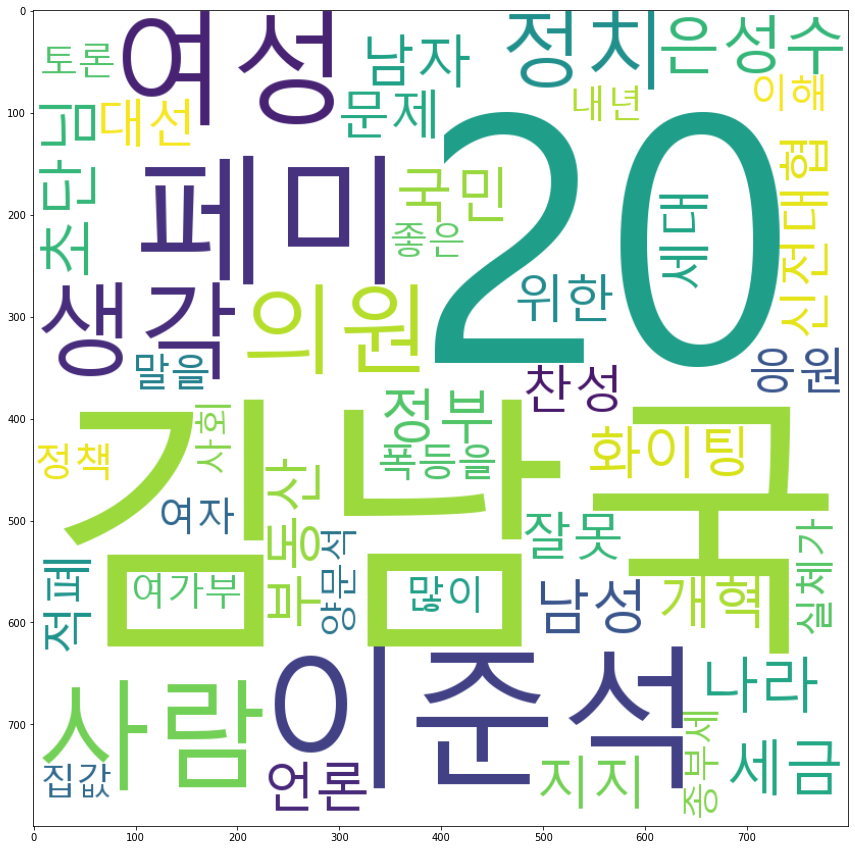

In [17]:
import random

# 워드클라우드 색상 변경 함수 (리턴 위 : 보라색, 리턴 아래 : 회색 계열)
def color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl({:d},{:d}%, {:d}%)".format(np.random.randint(212,313),np.random.randint(26,32),np.random.randint(45,80)))
    #return 'hsl(0, 0%%, %d%%)' % random.randint(60, 100)
    
# 폰트 패스 설정
font_path = "c:/Windows/Fonts/malgun.ttf"

# 바탕화면 지도 모양으로 만들기 위해 지도 이미지 들고오기
image_map = np.array(Image.open('data/map.png'))

krwordrank_cloud = WordCloud(
    font_path = font_path,
    width = 800,
    height = 800,
    #mask=image_map,
    background_color="white",
    # color_func = color_func,
    #colormap = 'PRGn'
)

krwordrank_cloud = krwordrank_cloud.generate_from_frequencies(passwords)

fig = plt.figure(figsize=(15, 15))
plt.imshow(krwordrank_cloud, interpolation="bilinear")
plt.show()

# wordcloud 불용어 있으면 불용어 사전에 추가하기

In [18]:
# f = open("data/stopwords.txt",'a')
# for t in stopwords:
#     f.write(t+'\n')
# f.close()

In [19]:
# f = open("data/stopwords.txt",'a')
# f.write('ㅎㅎ\n')
# f.write('못하\n')
# f.write('됩니다.\n')
# f.write('합니다.\n')
# f.write('것이\n')
# f.write('입니다.\n')
# f.write('있습니다.\n')
# f.write('이렇게.\n')
# f.write('한다.\n')
# f.write('겁니다.\n')
# f.write('민주당\n')
# f.write('오세훈\n')
# f.write('문재인\n')
# f.write('것을\n')
# f.write('이렇게\n')
# f.write('너무\n')
# f.write('가지고\n')
# f.write('ㅋㅋ\n')
# f.write('크크크\n')
# f.write('대한\n')
# f.write('지금\n')
# f.close()

# 핵심 문장 추출

In [20]:
# 불용어 처리 O 버전
penalty = lambda x:0 if (25 <= len(x) <= 80) else 1 # 너무 길거나 짧은 문장 제거

stopwords = stopwords
num_keywords = 100
num_keysents = 11

# 다양한 조건 추가 (불용어 처리 등등)
keywords, sents = summarize_with_sentences(
    texts,
    penalty=penalty,
    stopwords = stopwords,
    diversity=0.9,
    num_keywords=num_keywords,
    num_keysents=num_keysents,
    verbose=False
)
print(sents,keywords)
print(len(keywords))

['50대 여성이고20대 딸아이가 있습니다바로 이거에요페미를 주장하는 메갈녀들페미도 특권 맞습니다이런 목소리가 나와야해요김남국의원 응원합니다', '언론개혁이 문제!!!부동산문제도 ‥ 언론이 현정부를 무능으로 몰고있다생각함', '이준석 내일모레 40살먹는 30대 극후반 남자로서 지지합니다. 나중에 40대초반을 위한 정책도 제시해주시면 더 감사합니다', '남녀 평등 떠나서 다른나라는 여자 군대 안가는데 우리나라에서 여자도 군대가라고 하면 다른 나라 갈래ㄷㄷㄷ', '신전대협...화이팅...젊은이들과 우린국민모두의 삶을짓밟아넣은 문정권4년...히루빨리 대한민국을되살리는..거대한물결이 되어주길....', '정치초단님 반가워요 항상 좋은 말씀을 참엉망이다 정치일 확실게댜.ㅅ', '민주당 사람들도 친문친문거리는데 실체가 없다는 소리는 먼 개소리냐?지건 마렵네', '왜 방송국들이 은성수 비난쪽으로 방향을 틀었을까?그기 근무자도 비트코인을 많이하고피해를 봤기 때문일거다 ㅎㅎ', '다음 대선은 머 보수쪽에서 100% 나오겠지만 보수는 이걸 교훈삼아앞으로 잘해야 할거다 나도 ㅅㅂ 이번엔 꼭 투표한다 그리고 사회자진행 깔끔하네', '계속 조국님을 위해 주세요  조국씨가 잘못했어며  국회인간들은뒤조사 하며  죄가 더많을 껄요얼굴에 껍질 뺏기며 다있을걸요', '양문석 교수 자기 논리를 스스로 무너뜨리네요.4~50대가 2~30대에 책임을 넘기는 건 안된다고 하는데 젠더이슈를 스스로 무너뜨리네요.'] {'20': 6.3845966060603745, '김남국': 5.726963089329074, '이준석': 5.130506154695921, '페미': 4.247137660647077, '여성': 4.033241617617584, '사람': 3.781489320454172, '생각': 3.574218178219668, '의원': 3.42178287382494, '정치': 3.3510244078312943, '은성수': 3.1171698601642883, '초단님': 2.879078834528

In [21]:
print(f'핵심 키워드 개수: {len(keywords)}')
print(f'핵심 키워드 : {keywords}')

핵심 키워드 개수: 100
핵심 키워드 : {'20': 6.3845966060603745, '김남국': 5.726963089329074, '이준석': 5.130506154695921, '페미': 4.247137660647077, '여성': 4.033241617617584, '사람': 3.781489320454172, '생각': 3.574218178219668, '의원': 3.42178287382494, '정치': 3.3510244078312943, '은성수': 3.1171698601642883, '초단님': 2.8790788345283254, '나라': 2.824858818562294, '세금': 2.691070071308874, '국민': 2.582011583960511, '정부': 2.5805838174770743, '부동산': 2.5735863217690746, '남성': 2.567634600321588, '지지': 2.4120745586928267, '남자': 2.390568586507014, '개혁': 2.332726432098105, '화이팅': 2.3019273358860417, '언론': 2.24283147033529, '문제': 2.098992867891354, '신전대협': 2.0782404290407364, '세대': 2.068826902547477, '위한': 1.9652005268233008, '대선': 1.9304164895159763, '잘못': 1.912369734221612, '찬성': 1.8957611632591593, '적폐': 1.8805205455286678, '응원': 1.8760883039627272, '폭등을': 1.872966608354497, '정책': 1.8640896299277463, '실체가': 1.859464716848605, '많이': 1.8542646159726877, '말을': 1.826892892856871, '여자': 1.802651787356381, '이해': 1.8006228647385063, 

In [22]:
# 핵심 키워드 리스트로 저장
keywords_list = []
for k,v in keywords.items():
    keywords_list.append(k)
keywords_list = keywords_list
keywords_list

['20',
 '김남국',
 '이준석',
 '페미',
 '여성',
 '사람',
 '생각',
 '의원',
 '정치',
 '은성수',
 '초단님',
 '나라',
 '세금',
 '국민',
 '정부',
 '부동산',
 '남성',
 '지지',
 '남자',
 '개혁',
 '화이팅',
 '언론',
 '문제',
 '신전대협',
 '세대',
 '위한',
 '대선',
 '잘못',
 '찬성',
 '적폐',
 '응원',
 '폭등을',
 '정책',
 '실체가',
 '많이',
 '말을',
 '여자',
 '이해',
 '여가부',
 '토론',
 '좋은',
 '내년',
 '양문석',
 '종부세',
 '사회',
 '집값',
 '조국',
 '평등',
 '저도',
 '친문',
 '알고',
 '밖에',
 '것은',
 '정권',
 '논리',
 '투기',
 '열심히',
 '진보',
 '군대',
 '교수',
 '그걸',
 '180석',
 '지들이',
 '협치는',
 '남녀',
 '비트',
 '필요',
 '어버버',
 '분석',
 '국회',
 '보수',
 '반대',
 '말하',
 '우파',
 '표심',
 '나는',
 '전체',
 '안되',
 '선거',
 '감사',
 '기득권',
 '말고',
 '투자',
 '말이',
 '코로나',
 '특권',
 '초선',
 '최고',
 '가상화폐',
 '니들은',
 '여러',
 '준석',
 '저는',
 '이유',
 '더이상',
 '엄청',
 '출신',
 '잘하',
 '채널',
 '여당']

In [23]:
print(f'핵심 문장 개수: {len(sents)}')
print(f'핵심 문장 : {sents}')

핵심 문장 개수: 11
핵심 문장 : ['50대 여성이고20대 딸아이가 있습니다바로 이거에요페미를 주장하는 메갈녀들페미도 특권 맞습니다이런 목소리가 나와야해요김남국의원 응원합니다', '언론개혁이 문제!!!부동산문제도 ‥ 언론이 현정부를 무능으로 몰고있다생각함', '이준석 내일모레 40살먹는 30대 극후반 남자로서 지지합니다. 나중에 40대초반을 위한 정책도 제시해주시면 더 감사합니다', '남녀 평등 떠나서 다른나라는 여자 군대 안가는데 우리나라에서 여자도 군대가라고 하면 다른 나라 갈래ㄷㄷㄷ', '신전대협...화이팅...젊은이들과 우린국민모두의 삶을짓밟아넣은 문정권4년...히루빨리 대한민국을되살리는..거대한물결이 되어주길....', '정치초단님 반가워요 항상 좋은 말씀을 참엉망이다 정치일 확실게댜.ㅅ', '민주당 사람들도 친문친문거리는데 실체가 없다는 소리는 먼 개소리냐?지건 마렵네', '왜 방송국들이 은성수 비난쪽으로 방향을 틀었을까?그기 근무자도 비트코인을 많이하고피해를 봤기 때문일거다 ㅎㅎ', '다음 대선은 머 보수쪽에서 100% 나오겠지만 보수는 이걸 교훈삼아앞으로 잘해야 할거다 나도 ㅅㅂ 이번엔 꼭 투표한다 그리고 사회자진행 깔끔하네', '계속 조국님을 위해 주세요  조국씨가 잘못했어며  국회인간들은뒤조사 하며  죄가 더많을 껄요얼굴에 껍질 뺏기며 다있을걸요', '양문석 교수 자기 논리를 스스로 무너뜨리네요.4~50대가 2~30대에 책임을 넘기는 건 안된다고 하는데 젠더이슈를 스스로 무너뜨리네요.']


# 추출한 핵심 키워드 저장

In [24]:
keyword = pd.DataFrame()
keyword['keyword'] = keywords_list
keyword

,keyword
0,20
1,김남국
2,이준석
3,페미
4,여성
...,...
95,엄청
96,출신
97,잘하
98,채널


In [25]:
keyword.to_csv('data/keyword.csv',encoding='utf-8-sig')

# 추출한 핵심 문장 저장

In [26]:
keysentence = pd.DataFrame()
keysentence['keysentence'] = sents
keysentence = keysentence[1:]
keysentence

,keysentence
1,언론개혁이 문제!!!부동산문제도 ‥ 언론이 현정부를 무능으로 몰고있다생각함
2,이준석 내일모레 40살먹는 30대 극후반 남자로서 지지합니다. 나중에 40대초반을 ...
3,남녀 평등 떠나서 다른나라는 여자 군대 안가는데 우리나라에서 여자도 군대가라고 하면...
4,신전대협...화이팅...젊은이들과 우린국민모두의 삶을짓밟아넣은 문정권4년...히루빨...
5,정치초단님 반가워요 항상 좋은 말씀을 참엉망이다 정치일 확실게댜.ㅅ
6,민주당 사람들도 친문친문거리는데 실체가 없다는 소리는 먼 개소리냐?지건 마렵네
7,왜 방송국들이 은성수 비난쪽으로 방향을 틀었을까?그기 근무자도 비트코인을 많이하고피...
8,다음 대선은 머 보수쪽에서 100% 나오겠지만 보수는 이걸 교훈삼아앞으로 잘해야 할...
9,계속 조국님을 위해 주세요 조국씨가 잘못했어며 국회인간들은뒤조사 하며 죄가 더...
10,양문석 교수 자기 논리를 스스로 무너뜨리네요.4~50대가 2~30대에 책임을 넘기는...


In [27]:
keysentence.to_csv('data/keysentence.csv',encoding='utf-8-sig')

# 추출한 핵심 키워드 & 문장 함께 저장

In [28]:
keyword_keysentence = pd.DataFrame()
keyword_keysentence['keyword'] = keywords_list[:len(sents)]
keyword_keysentence['keysentence'] = sents[:len(keyword)]
keyword_keysentence

,keyword,keysentence
0,20,50대 여성이고20대 딸아이가 있습니다바로 이거에요페미를 주장하는 메갈녀들페미도 특...
1,김남국,언론개혁이 문제!!!부동산문제도 ‥ 언론이 현정부를 무능으로 몰고있다생각함
2,이준석,이준석 내일모레 40살먹는 30대 극후반 남자로서 지지합니다. 나중에 40대초반을 ...
3,페미,남녀 평등 떠나서 다른나라는 여자 군대 안가는데 우리나라에서 여자도 군대가라고 하면...
4,여성,신전대협...화이팅...젊은이들과 우린국민모두의 삶을짓밟아넣은 문정권4년...히루빨...
5,사람,정치초단님 반가워요 항상 좋은 말씀을 참엉망이다 정치일 확실게댜.ㅅ
6,생각,민주당 사람들도 친문친문거리는데 실체가 없다는 소리는 먼 개소리냐?지건 마렵네
7,의원,왜 방송국들이 은성수 비난쪽으로 방향을 틀었을까?그기 근무자도 비트코인을 많이하고피...
8,정치,다음 대선은 머 보수쪽에서 100% 나오겠지만 보수는 이걸 교훈삼아앞으로 잘해야 할...
9,은성수,계속 조국님을 위해 주세요 조국씨가 잘못했어며 국회인간들은뒤조사 하며 죄가 더...


In [29]:
keyword_keysentence.to_csv('data/keyword_keysentence.csv',encoding='utf-8-sig')